<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/remocoes_gol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib.dates import HourLocator, DayLocator, DateFormatter, MonthLocator, YearLocator
import calendar


# Data

Conversão para séries de quantidades diárias, semanais e mensais.

In [2]:
remocoes = pd.read_excel('https://github.com/Rogerio-mack/work/raw/main/Remocoes_2013_2023.xlsx')
remocoes.index = pd.to_datetime( remocoes['Rem. Date'] )
remocoes.head()

,Vendor,Part No.,Serial No.,Description,AC Reg.,ATA,WO-No.,Rem. Date,Reason,Order No.,Responsible,Created By,TSN,CSN,TBI,CBI,Removal Type
Rem. Date,,,,,,,,,,,,,,,,,
2023-08-16,07217,1152466-250,071C-0325,APU STARTER CONVERTER UNIT (SCU),GXU,49-40,101093044.0,2023-08-16,"1 WORKSTEP ADDED ON 16.AUG.2023, 00:20 CLOSING...",R77768223,46353.0,15319.0,52189,37795,4117,2760,US
2023-08-16,028787410001,5500A1ABF23A,P10091366,PORTABLE OXYGEN CYLINDER ASSY,GGM,35-31,101104230.0,2023-08-16,"1 WORKSTEP ADDED ON 16.AUG.2023, 04:40 CLOSING...",R77771323,13594.0,13594.0,31231,20226,9820,5878,US
2023-08-16,028787410001,806835-01,C18070925,CREW OXYGEN CYLINDER ASSY,GGJ,35-12,308750287.0,2023-08-16,"1 WORKSTEP ADDED BY 00050313 ON 16.AUG.2023, 0...",R77774123,46473.0,50313.0,6932,4160,346,236,US
2023-08-15,USA079,398908-3,13163,TEMPERATURE CONTROL VALVE,GXQ,21-61,308747212.0,2023-08-15,DUE SEAL MISSING,R77746223,46353.0,31721.0,44939,27920,7849,5328,US
2023-08-15,33126,162BL801,12104615,FUEL TEMP INDICATOR,GUU,28-40,101093054.0,2023-08-15,FUEL TEMP INDICATOR LIGHT INOP,R77746323,6509.0,6509.0,33023,21776,33023,21776,US


In [3]:
df_daily = remocoes[['ATA']].resample('D').count()
df_daily.head()

,ATA
Rem. Date,
2013-01-01,18
2013-01-02,32
2013-01-03,27
2013-01-04,51
2013-01-05,33


In [4]:
df_weekly = remocoes[['ATA']].resample('W').count()
df_weekly.head()

,ATA
Rem. Date,
2013-01-06,197
2013-01-13,213
2013-01-20,239
2013-01-27,212
2013-02-03,215


In [5]:
df_monthly = remocoes[['ATA']].resample('M').count()
df_monthly.head()

,ATA
Rem. Date,
2013-01-31,975
2013-02-28,945
2013-03-31,1023
2013-04-30,993
2013-05-31,1018


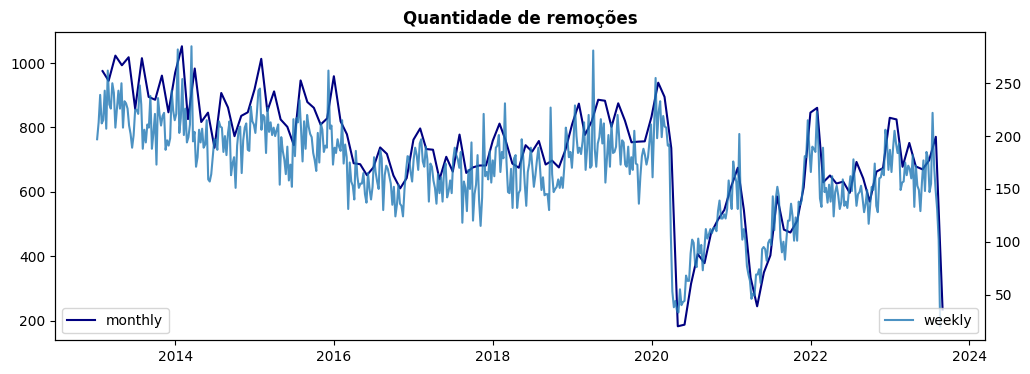

In [6]:
fig, ax = plt.subplots(figsize=(12,4))

# plt.plot(df_daily,label='daily')
ax.plot(df_monthly,label='monthly',color='navy')
plt.legend(loc='lower left')
ax1 = ax.twinx()
ax1.plot(df_weekly,label='weekly',alpha=0.8)
plt.legend(loc='lower right')

plt.title('Quantidade de remoções',fontsize=12,weight='bold')

plt.show()

**Há uma mudança no perfil das remoções nos anos de 2020-2021, provavelmente pela pandemia e trocas das aeronaves, o que sugere que o histórico de dados muito mais antigos das remoções ($<2021$) talvez não devam ser considerados em alguns cenários de predição.**

# Sazonalidades

Empregam-se aqui os valores mensais e semanais de vários anos.

In [7]:
df_weekly['year'], df_weekly['month'], df_weekly['week'] = df_weekly.index.year, df_weekly.index.month, df_weekly.index.isocalendar().week
df_monthly['year'], df_monthly['month'], df_monthly['week'] = df_monthly.index.year, df_monthly.index.month, df_monthly.index.isocalendar().week

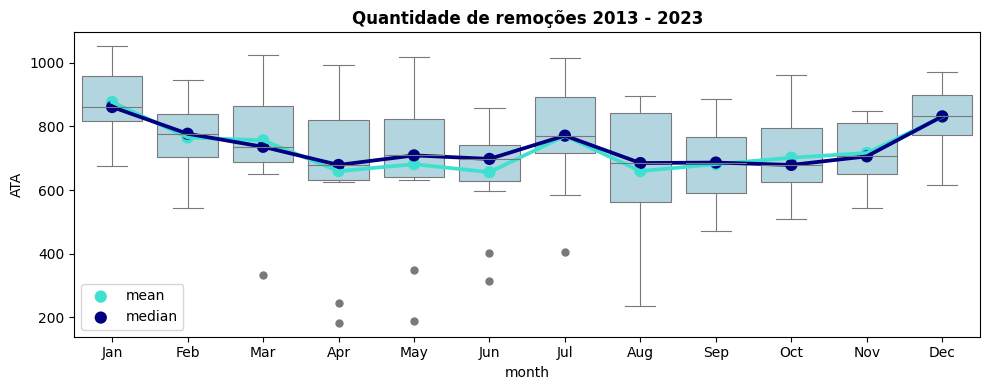

In [8]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.boxplot(x='month', y='ATA', data = df_monthly, ax=ax, color='lightblue', saturation=0.8, linewidth=0.8, flierprops={"marker": "o"})
ax = sns.pointplot(x='month', y='ATA', data = df_monthly, errorbar=None, color='turquoise', markers="o",label='mean')
ax = sns.pointplot(x='month', y='ATA', data = df_monthly, errorbar=None, color='navy', markers="o", estimator='median',label='median')

ax.set_xticks(df_monthly.month.unique()-1,[calendar.month_name[x][0:3] for x in df_monthly.month.unique()])
ax.legend()
plt.title('Quantidade de remoções 2013 - 2023',fontsize=12,weight='bold')

plt.tight_layout()
plt.show()

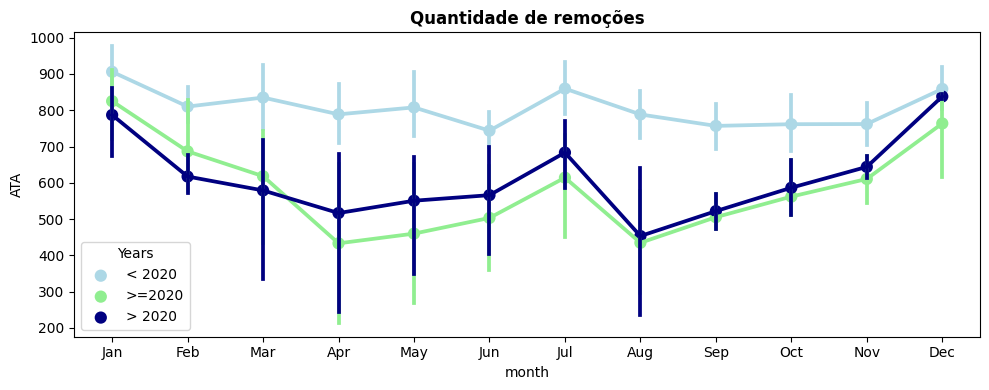

In [9]:
fig, ax = plt.subplots(figsize=(10,4))

selection = df_monthly.year < 2020
ax = sns.pointplot(x='month', y='ATA', data = df_monthly[ selection ], color='lightblue', markers="o",label='< 2020')
selection = df_monthly.year >= 2020
ax = sns.pointplot(x='month', y='ATA', data = df_monthly[ selection ], color='lightgreen', markers="o",label='>=2020')
selection = df_monthly.year > 2020
ax = sns.pointplot(x='month', y='ATA', data = df_monthly[ selection ], color='navy', markers="o",label='> 2020')

ax.set_xticks(df_monthly.month.unique()-1,[calendar.month_name[x][0:3] for x in df_monthly.month.unique()])
plt.legend(title='Years')
plt.title('Quantidade de remoções',fontsize=12,weight='bold')

plt.tight_layout()
plt.show()

**As mudanças de comportamento da remoções sugere aqui o uso somente dos anos mais recentes ($>2020) para busca de uma padrão da série de remoções.**

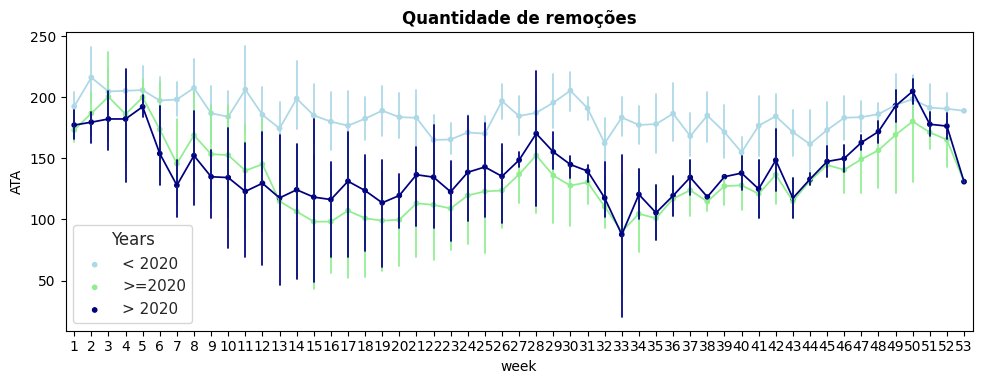

In [10]:
fig, ax = plt.subplots(figsize=(10,4))
sns.set(style="ticks", rc={"lines.linewidth": 0.7})

selection = df_weekly.year < 2020
ax = sns.pointplot(x='week', y='ATA', data = df_weekly[ selection ], color='lightblue', markers="o",label='< 2020')
selection = df_weekly.year >= 2020
ax = sns.pointplot(x='week', y='ATA', data = df_weekly[ selection ], color='lightgreen', markers="o",label='>=2020')
selection = df_weekly.year > 2020
ax = sns.pointplot(x='week', y='ATA', data = df_weekly[ selection ], color='navy', markers="o",label='> 2020')

# ax.set_xticks(df_weekly.month.unique()-1,[calendar.month_name[x][0:3] for x in df_weekly.month.unique()])
plt.legend(title='Years')
plt.title('Quantidade de remoções',fontsize=12,weight='bold')

plt.tight_layout()
plt.show()